<h1 style="text-align:center">Travail pratique numérique en thermodynamique statistique</h1>
<h2 style="text-align:center">PARTIE 1 : Cinétique des gaz parfaits</h2>

Veuillez indiquer le nom des membres de votre équipe dans la cellule suivante.

Olivier Gilbert et Xavier Boucher

# Introduction #
Ce travail révise d'abord quelques bases générales de mécanique statistique classique avec le script `tds2Danimation_hXX.py` qui simule la théorie cinétique des gaz parfaits en 2D. Cette simulation utilise le concept de sphères dures, mais ici pour le cas des particules d'un gaz afin d'introduire des collisions élastiques entre elles sur leurs trajectoires ballistiques. Notez qu'une sphère est colorée et grossie seulement pour l’effet visuel dans l'animation, la physique de l’algorithme codé considère bien des particules totalement identiques. Les questions sur cette simulation, à répondre directement dans les cellules du carnet _(Notebook)_ ici-même, explorent quelques paramètres de la thermodynamique statistique et introduisent de nouveaux termes utiles à l'étude du mouvement des électrons dans la matière.

_N.B._ 
- _Pour montrer les animations à l'écran, le script `tds2Danimation_hXX.py` importe la librairie `VPython` qu'il faut donc installer. Des liens vers sa documentation et de l'information complémentaire sont donnés dans la médiagraphie à la fin._
- _Le code dans ce script est abusivement commenté dans notre contexte pédagogique, mais il serait bien sûr préférable de s’en tenir aux recommandations du <a href="https://www.python.org/dev/peps/pep-0008"> PEP 8 — Style Guide for Python Code</a>._
- _Notez finalement que la boucle principale à la fin du script laisse l'utilisateur voir l'animation aussi longtemps que souhaité, assurez-vous donc de savoir comment l'interrompre correctement avant de lancer la simulation ou de la remplacer par une boucle `for`._

# 1<sup>re</sup> partie - Cinétique CLASSIQUE des gaz parfaits #

### Simulation 2D ###

In [183]:
import sys
sys.path.append("PHY-3003/")
from vpython import *
%run tds2Danimation_h25.py
# ou
#%run tds3Dsim_h25.py #si disponible : script sans la lente animation Vpython qui est en développement à la session h25!
# Remplacez "XX" par les deux derniers chiffres de l'année de votre session.
# N'hésitez pas à exécuter l'animation 2D ou la simulation 3D à l'extérieur du _Notebook_. Cette cellule vise à préciser que les questions qui suivent se basent sur ces scripts et doivent mener aux mêmes répomses autant en 2D qu'en 3D.

### Questions statistiques ###

**I.** _(3 points)_  &mdash; Utilisez la liste finale des vecteurs de quantité de mouvement $\vec{p}$ de toutes les sphères pour calculer la moyenne de son carré $\langle p^2\rangle=\langle\vec{p}\cdot\vec{p}\rangle$ en écrivant le code nécessaire dans la cellule qui suit. 

In [184]:
from vpython import *
import numpy as np
import math
import pickle
# Liste finale: 
p = pickle.load(open("qte_mvt.pkl", "rb"))
mag_list = []
for vec in p:
    mag_list.append((vec.mag)**2)
p2_moy = np.mean(mag_list)
print(f"<p2> = {p2_moy}")

<p2> = 5.599999999999999e-47


### Rép: $<p^2>=5.6\cdot10^{-47}$


**II.** _(2 points)_  &mdash; La température $T$ (macroscopique) est proportionnelle à l'énergie cinétique moyenne $E_{cin}$ de l'ensemble des particules lorsque ce système est rendu à l'équilibre. Celle-ci peut se calculer classiquement selon son <a href="https://fr.wikipedia.org/wiki/%C3%89quipartition_de_l%27%C3%A9nergie">principe d'équipartition</a>, _i.e._ en répartissant l'énergie également sur chaque degré de liberté ici en translation seulement d'où, au total pour $\text{DIM}=1,2\text{ ou } 3$ dimensions d'espace réel,
\begin{equation}
E_{cin}=\frac{\langle p^2 \rangle}{2m}=\text{DIM}\times\frac{1}{2}k_BT
\end{equation}
avec $k_B$, la constante de Boltzmann et $m$, la masse de chaque particule. Quelle est la température du gaz de sphères dures à la fin de la simulation? Est-ce qu'elle a changé significativement par rapport à sa valeur initiale?

In [185]:
DIM = 2 #Nombre de degrés de liberté de la simulation 
mass = 4E-3/6E23 # helium mass
k = 1.4E-23 # Boltzmann constant
T_initiale = 300 # around room temperature
def temperature(p2):
    return p2/(mass*DIM*k)
T_finale = temperature(p2_moy)

print(f"Température initiale: {T_initiale}")
print(f"Température finale: {T_finale}")

Température initiale: 300
Température finale: 299.99999999999994


### Rép: Non, elle n'a pas changé significativement.

**III.** _(10 points)_ &mdash; Modifiez le code de la simulation pour ajouter une fonction qui suit la trajectoire d'UNE SEULE particule, c'est-à-dire qu'elle doit enregistrer, dans une liste, des valeurs de variables pour cette particule et ce, à chacune de ses collisions avec une autre particule (_i.e._ excluez les collisions avec les parois de la boîte). Les deux variables scalaires à lister sont:
- la distance que la particule a parcouru entre chaque collision,
- le temps écoulé entre ces collisions.

Copiez le code de votre fonction dans la cellule qui suit en y commentant clairement les variables pour ces listes qui devront persister après avoir interrompu l'exécution de la simulation. N'oubliez pas d'inclure votre fichier Python (`.py`) modifié avec la simulation complète lors de la remise.

In [186]:
def follow_particle(deltax, hitlist, deltapos, liste_temps_entre_collision, liste_distance_entre_collision,liste_distance_x_entre_collision,liste_distance_y_entre_collision,liste_distance_z_entre_collision, n_particle=0, iterations_since_last_col=0):
    """
    n_particle: indice de la particule à suivre
    iterations_since_last_col: nombre d'itérations depuis que la particule a subit une collision
    liste_temps_entre_collision: liste de temps entre les collisions
    liste_distance_entre_collision: liste des distances entre les collisions
    liste_distance_x_entre_collision: liste des distances x entre les collisions
    liste_distance_y_entre_collision: liste des distances y entre les collisions
    liste_distance_z_entre_collision: liste des distances z entre les collisions
    """
    iterations_since_last_col += 1
    deltapos.x += np.abs(deltax[n_particle].x)
    deltapos.y += np.abs(deltax[n_particle].y)
    deltapos.z += np.abs(deltax[n_particle].z)
    particle_hit = False
    for ij in hitlist:
        i,j = ij[0], ij[1]
        if i == n_particle or j == n_particle:
            particle_hit = True
    if particle_hit:
        liste_temps_entre_collision.append(iterations_since_last_col*dt)
        liste_distance_entre_collision.append(deltapos.mag)
        liste_distance_x_entre_collision.append(np.abs(deltapos.x))
        liste_distance_y_entre_collision.append(np.abs(deltapos.y))
        liste_distance_z_entre_collision.append(np.abs(deltapos.z))
        return 0, vector(0,0,0)
    return iterations_since_last_col, deltapos

**IV.** _(2 points)_ &mdash; Calculez le **libre parcours moyen** $l_{moy}$ et le **temps de collision** $\tau$ qui sont les valeurs moyennes des deux listes compilées au numéro précédent.

_(Pour votre information, le libre parcours moyen est de l’ordre de 100 nm dans l'air à température et pression ambiantes, mais_ $l_{moy}$ _peut dépasser 100 000 km dans une enceinte sous vide avec les technologies de pompes modernes!)_



In [187]:

data = np.loadtxt("data.txt")

liste_temps_entre_collision = data[:,0]
liste_distance_entre_collision = data[:,1]
print(f"Temps moyen {np.around(np.mean(liste_temps_entre_collision), decimals=8)} s")
print(f"Distance moyenne {np.around(np.mean(liste_distance_entre_collision), decimals=4)} m")

Temps moyen 5.49e-05 s
Distance moyenne 0.0531 m


**V.** _(2 points)_ Calculez la vitesse $\vec{v}$ de la particule entre chaque paire de collisions. Quelle est la vitesse moyenne $\langle\vec{v}\rangle$ de la particule?

In [194]:
data = np.loadtxt("data.txt")

temps_entre_collision = data[:,0]
distance_entre_collision = data[:,1]
distance_x_entre_collision = data[:,2]
distance_y_entre_collision = data[:,3]
distance_z_entre_collision = data[:,4]

vitesse_moyenne = vector(np.sum(distance_x_entre_collision),np.sum(distance_y_entre_collision),np.sum(distance_z_entre_collision))/np.sum(temps_entre_collision)
print(f"Vitesse moyenne: {vitesse_moyenne} m/s")

Vitesse moyenne: <599.106, 626.213, 0> m/s


**VI.** _(5 points)_ &mdash; Pour cette même liste de vitesses, comparez les distributions de la norme $||\vec{v}||$, du carré $v^2$ et d’une de ses composantes $v_x^2$ en étalonnant l’abscisse pour contraster les histogrammes avec une échelle appropriée. Indiquez sur ce graphique la moyenne, le mode, la médiane et la moyenne quadratique des distributions.

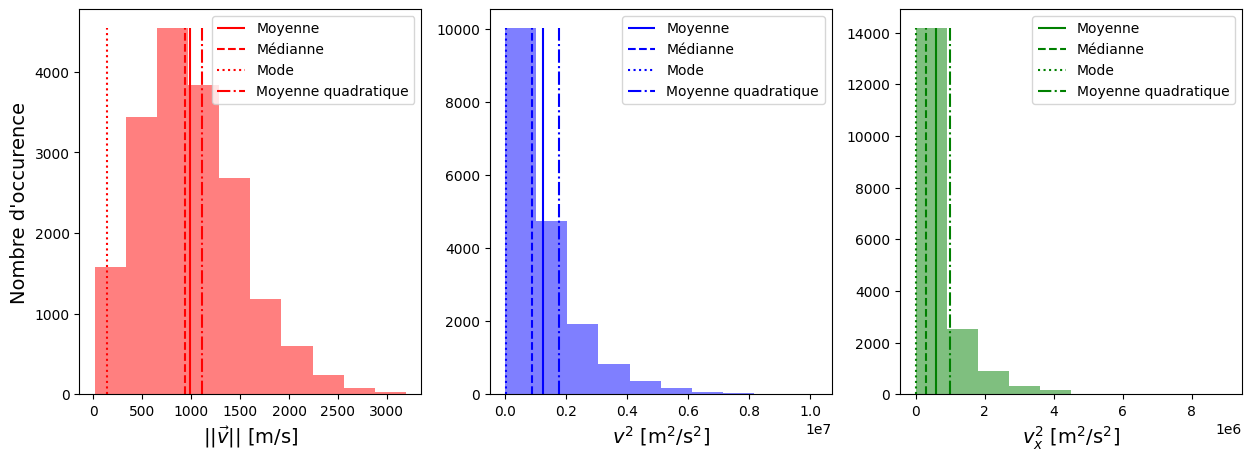

In [228]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

data = np.loadtxt("data.txt")
temps_entre_collision = data[:,0]
distance_entre_collision = data[:,1]
distance_x_entre_collision = data[:,2]
distance_y_entre_collision = data[:,3]
distance_z_entre_collision = data[:,4]

vitesse_vecteur = [vector(distance_x_entre_collision[i]/temps_entre_collision[i],distance_y_entre_collision[i]/temps_entre_collision[i],distance_z_entre_collision[i]/temps_entre_collision[i]) for i in range(len(temps_entre_collision))]
vitesse_scalaire = distance_entre_collision/temps_entre_collision

norme_vitesse = np.array([i.mag for i in vitesse_vecteur])
#vitesse_scalaire_carre = norme_vitesse**2
vitesse_x_carre = np.array(distance_x_entre_collision/temps_entre_collision)**2
vitesse_y_carre = np.array(distance_y_entre_collision/temps_entre_collision)**2
vitesse_z_carre = np.array(distance_z_entre_collision/temps_entre_collision)**2
vitesse_scalaire_carre = vitesse_x_carre+vitesse_y_carre+vitesse_z_carre

def stats(a):
    """Retourne les statistiques qu'on veut afficher pour un array quelconque 'a'."""
    mean_val = np.mean(a)
    median_val = np.median(a)
    mode_val = mode(a, nan_policy='omit', keepdims=False)[0]
    rms_val = np.sqrt(np.mean(a**2))
    return mean_val, median_val, mode_val, rms_val


# Mon graphique:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
hist1 = ax1.hist(norme_vitesse, density=False, alpha=0.5, color="red")
hist2 = ax2.hist(vitesse_scalaire_carre, density=False, alpha=0.5, color="blue")
hist3 = ax3.hist(vitesse_x_carre, density=False, alpha=0.5, color="green")
for i,distribution in enumerate([norme_vitesse,vitesse_scalaire_carre,vitesse_x_carre]):
    stat = stats(distribution)
    max_val = np.max(([hist1,hist2,hist3][i])[0])
    color = ["red","blue","green"][i]
    ax = [ax1,ax2,ax3][i]
    ax.vlines(stat[0], 0, max_val, linestyles="solid", color=color, label="Moyenne")
    ax.vlines(stat[1], 0, max_val, linestyles="dashed", color=color, label="Médianne")
    ax.vlines(stat[2], 0, max_val, linestyles="dotted", color=color, label="Mode")
    ax.vlines(stat[3], 0, max_val, linestyles="dashdot", color=color, label="Moyenne quadratique")
ax1.set_ylabel("Nombre d'occurence", fontsize=14)
ax1.set_xlabel(r"$||{\vec{v}}||$ [m/s]", fontsize=14)
ax2.set_xlabel(r"$v^2$ [m$^2$/s$^2$]", fontsize=14)
ax3.set_xlabel(r"$v_x^2$ [m$^2$/s$^2$]", fontsize=14)
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()


**Bonus.** _(4 points)_ &mdash; Montrez que 
- (a) le théorème central limite est satisfait par une des distributions de vitesse du numéro précédent,
- (b) le système simulé est ergodique.

Distribution n'est pas une distribution normale. (Hypothèse nulle rejetée avec une p-value = 5.879037012253256e-41)


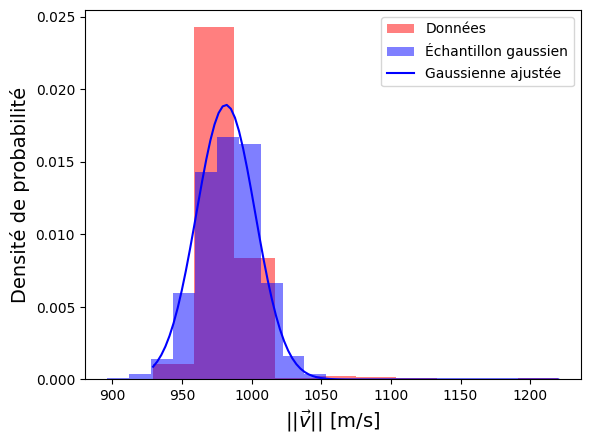

Distribution n'est pas une distribution normale. (Hypothèse nulle rejetée avec une p-value = 1.1258037433789885e-11)


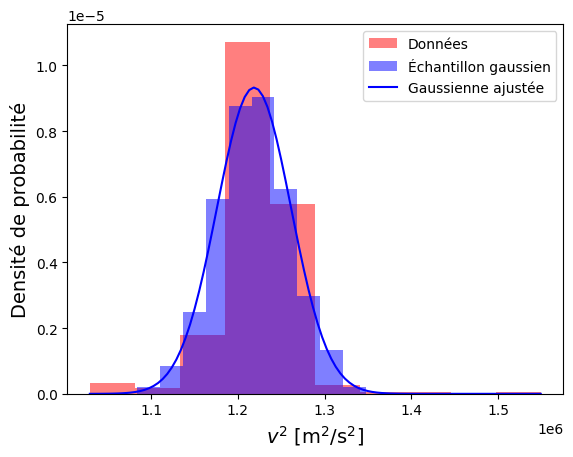

Distribution n'est pas une distribution normale. (Hypothèse nulle rejetée avec une p-value = 1.2491712429633262e-50)


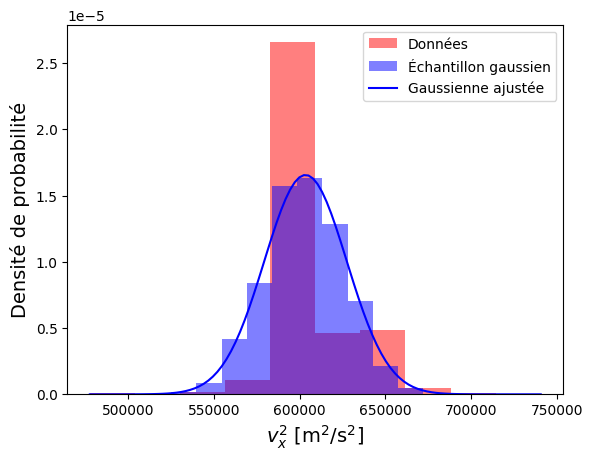

Distribution n'est pas une distribution normale. (Hypothèse nulle rejetée avec une p-value = 4.60113185590072e-38)


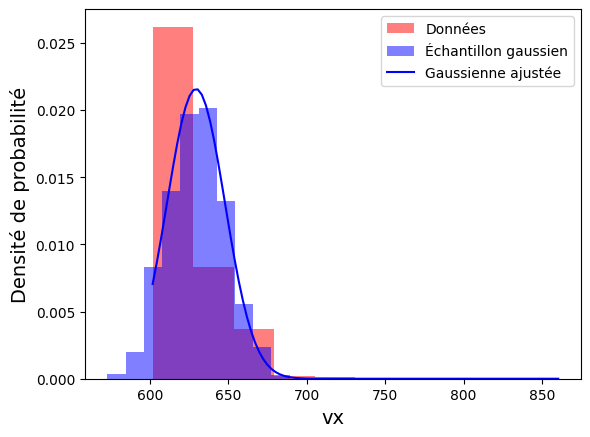

In [ ]:
from scipy.stats import ks_2samp, norm, ks_1samp, maxwell
from random import gauss


distribution_labels = [r"$||{\vec{v}}||$ [m/s]",r"$v^2$ [m$^2$/s$^2$]",r"$v_x^2$ [m$^2$/s$^2$]"]
for i,distribution in enumerate([norme_vitesse,vitesse_scalaire_carre,vitesse_x_carre]):
    N = 20 # taille de l'échantillon
    distribution = np.array([np.mean(distribution[k:int(N*(k+1))]) for k in range(int(len(distribution)/N))])
    mu, std = norm.fit(distribution) 
    stat = stats(distribution)
    distribution_label = distribution_labels[i]
    # On génère un échantillon provenant d'une distribution normale de même moyenne et variance que chacun de nos échantillons et on vérifie si l'hypothèse nulle
    echantillon = np.random.normal(mu, std, size=len(distribution))
    
    ks2 = ks_2samp(distribution, echantillon).pvalue
    ks1 = ks_1samp(distribution, norm.cdf, args=(mu, std)).pvalue
    if ks1 > 0.05:
        print(f"Distribution semble provenir d'une distribution normale. (Hypothèse nulle non-rejetée avec une p-value = {ks1})")
    else:
        print(f"Distribution n'est pas une distribution normale. (Hypothèse nulle rejetée avec une p-value = {ks1})")
    plt.hist(distribution, density=True, alpha=0.5, color="red", label="Données")
    plt.hist(echantillon, density=True, alpha=0.5, color="blue", label="Échantillon gaussien")
    x = np.linspace(min(distribution), max(distribution), 100)
    pdf_fitted = norm.pdf(x, mu, std)
    plt.plot(x, pdf_fitted, 'b-', label="Gaussienne ajustée")
    #params = maxwell.fit(distribution) 
    #pdf_fitted = maxwell.pdf(x, *params)
    #plt.plot(x, pdf_fitted, color="green", label="Maxwell ajustée")
    plt.xlabel(distribution_label, fontsize=14)
    plt.ylabel("Densité de probabilité", fontsize=14)
    plt.legend()
    plt.show()



Aucune des trois distributions ne suit le théorême central limite (TCL). En effet, $||v||$ suit une distribution de Maxwell-Boltzmann, nous savons que les composantes $v_x$, $v_y$ et $v_z$ sont distribués selon des gaussiennes, alors $v_x^2$ est distribué selon une distribution $\chi^2$ et $v^2$ selon une distribution de Maxwell-Boltzmann au carré.

# Médiagraphie #
 - La simulation utilise la librairie <a href="https://vpython.org">VPython</a> conçue pour faciliter la visualisation de physique en 3D, avec les instructions d’installation <a href="https://vpython.org/presentation2018/install.html">ici</a> et la documentation <a href="https://www.glowscript.org/docs/VPythonDocs/index.html">ici</a>. Le code adapte en 2D et commente en détail l’exemple <a href="https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/HardSphereGas-VPython">HardSphereGas-VPython</a> du site interactif <a href="https://www.glowscript.org">GlowScript</a> pour programmer des animations avec VPython directement en ligne.